In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 

In [2]:
def Q(f, xs, ys):
    X, Y = np.meshgrid(xs, ys)
    fx = np.vectorize(lambda x, y: f([x, y])[0])
    fy = np.vectorize(lambda x, y: f([x, y])[1])
    return X, Y, fx(X, Y), fy(X, Y)

Etude théorique
===========

Soit $f: \mathbb{R}^2 \to \mathbb{R}^2$ définie par
$$
f(x) = 
\left(
\begin{matrix}
x_1(\alpha -\beta x_2)  \\
-x_2(\gamma-\delta x_1)
\end{matrix}
\right)
$$

Question 1
---------------
On résout 
$$
f(x) = 0
$$
ce qui donne les points d'équilibre $(0,0)$ et $\bar{x}=\left(\frac{\gamma}{\delta},\frac{\alpha}{\beta} \right)$.

La jacobienne de la dynamique est donnée par
$$
J_f(x) = 
\left(
\begin{matrix}
\alpha -\beta x_2 & -\beta x_1 \\
\delta x_2 & -(\gamma-\delta x_1)
\end{matrix}
\right)
$$
En $(0,0)$,
$$
J_f(0,0) = 
\left(
\begin{matrix}
\alpha & 0 \\
0 & -\gamma
\end{matrix}
\right)
$$
a pour valeurs propres $\alpha>0$, donc $(0,0)$ est instable. Par contre, en $\bar{x}$,
$$
J_f(\bar{x}) = 
\left(
\begin{matrix}
0 & -\beta\frac{\gamma}{\delta} \\
\delta\frac{\alpha}{\beta} & 0
\end{matrix}
\right)
$$
a des valeurs propres imaginaires pures $\pm i\sqrt{\alpha\gamma}$, donc a priori on ne peut rien dire sur la stabilité du système nonlinéaire.

Question 2
-----------

<IPython.core.display.Javascript object>


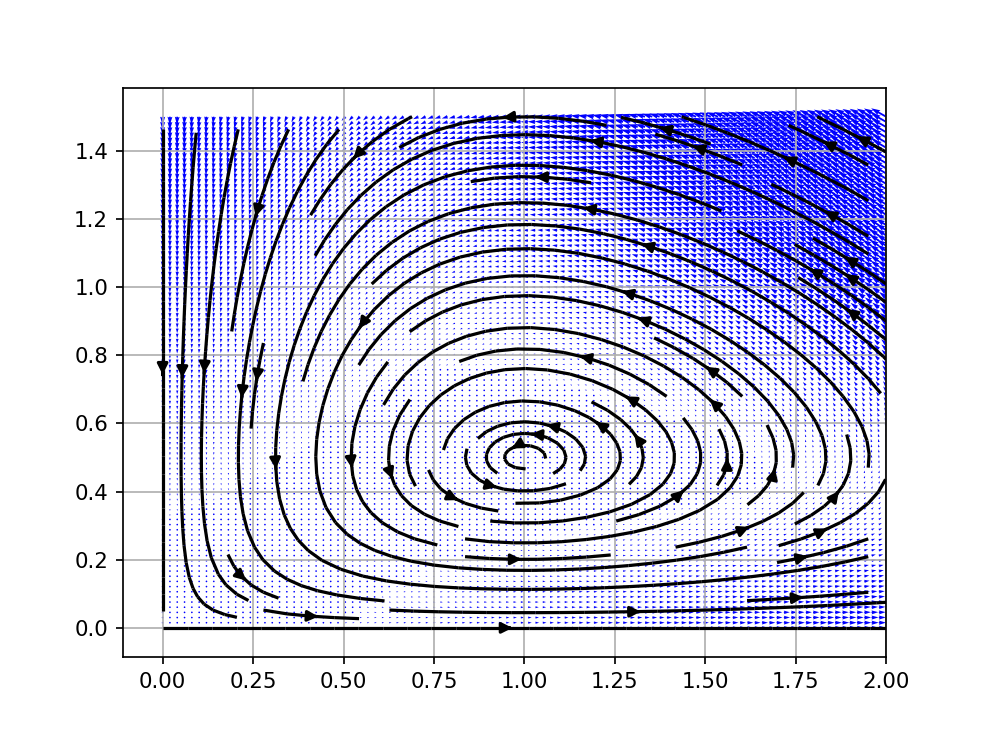

In [3]:
alpha = 2/3; beta = 4/3; delta = 1; gamma = 1;
def f_LV(x):
    x1, x2 = x
    return np.array([x1*(alpha-beta*x2), x2*(delta*x1-gamma)])

plt.figure()
x1 = np.linspace(0, 2, 100)
x2 = np.linspace(0, 1.5, 100)
plt.grid(True)
plt.quiver(*Q(f_LV, x1, x2), color="b") 
plt.streamplot(*Q(f_LV, x1, x2), color="k") 

Question 3
--------------------
Soit $x_0=(0,x_{2,0})\in \{0\}\times \mathbb{R}_{\geq 0}$ sur l'axe des ordonnées. Puisque $f$ est $C^1$ sur $\mathbb{R}^2$, par le théorème de Cauchy-Lipschitz, le problème de Cauchy associé à la condition initiale $(t_0,x_0)$ pour un $t_0$ quelconque, admet une **unique** solution 
$$
x(t) = (0, x_2(t))
$$
définie sur $\mathbb{R}$ avec $x_2$ solution de 
$$
\dot{x}_2 = -\gamma x_2 \ .
$$

De même, pour $x_0=(x_{1,0},0)\in \mathbb{R}_{\geq 0}\times \{0\}$, le problème de Cauchy associé pour un $t_0$ quelconque, admet une **unique** solution du type
$$
x(t) = (x_1(t), 0)
$$
définie sur $\mathbb{R}$ avec $x_1$ solution de 
$$
\dot{x}_1 = \alpha x_1 \ .
$$

Si une solution initialisée dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ croisait l'axe des abscisses ou des ordonnées, il existerait une autre solution au problème de Cauchy associé à $x_0=(0,x_{2,0})$ ou $x_0=(x_{1,0},0)$, ce qui est impossible. Elle reste donc dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$.

Question 4
----------

$f$ est continue sur $\mathbb{R} \times \mathbb{R}$ donc d'après le théorème du domaine maximal d'existence, si une solution maximale initialisée dans $\mathbb{R} \times \mathbb{R}$ n'est pas définie sur $\mathbb{R}$, c'est que nécessairement $\|x\|$ diverge en temps fini (car la frontière de $\mathbb{R} \times \mathbb{R}$ est vide)

Maintenant considérons une solution maximale $x:I\subset \mathbb{R} \to \mathbb{R}^2$ initialisée dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$. Par la question précédente, elle reste dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$  donc $H(x(t))$ est bien définie pour tout $t\in I$, et on a
$$
\frac{d}{dt}H(x(t)) = \langle \nabla H(x(t)) , \dot{x}(t) \rangle =  \langle \nabla H(x(t)) , f(x(t)) \rangle =0
$$
Donc $H$ est constante et il est impossible que $\|x\|$ diverge en temps fini car on aurait $\lim H(x(t)) = +\infty$. Donc $I=\mathbb{R}$.

*Remarque* : On aurait pu aussi directement se placer sur $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ et considérer les solutions maximales $x:I\subset \mathbb{R} \to \mathbb{R}_{>0}\times\mathbb{R}_{>0}$ de $\dot{x}=f(x)$ dans cet ensemble (où $f$ est bien sûr continue). Si $x$ n'était pas définie sur $\mathbb{R}$, alors nécessairement d'après le théorème du domaine maximal d'existence, $x$ tendrait vers la frontière de $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ ou divergerait, c'est-à-dire
    - soit $x$ exploserait 
    - soit $x_1$ tendrait vers 0 
    - soit $x_2$ tendrait vers 0.
(en temps fini) Mais ceci est impossible car alors on aurait dans chacun des cas
$$
\lim H(x(t)) = +\infty
$$
On prouve alors en même temps que les solutions initialisées dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ sont définies sur $\mathbb{R}$ dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ (et donc restent dans cet ensemble)

*Bonus* : Ici, en calculant le gradient et la hessienne de $H$, on voit que $H$ atteint un minimum local (et en fait global) en $\bar{x}$ (gradient nul et matrice hessienne définie positive, mais on peut aussi le montrer en étudiant la fonction réelle $u(z)=z-c\ln z$ pour une constante $c>0$). Donc  
$$
V(x) = H(x)-H(\bar{x})
$$
est une fonction $C^1$ sur $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$, positive, qui ne s'annule localement qu'en $\bar{x}$. Vu que $H$ est conservée le long des trajectoires, on peut déduire du théorème de Lyapunov que $\bar{x}$ est stable. 


Question 5
-----


<IPython.core.display.Javascript object>


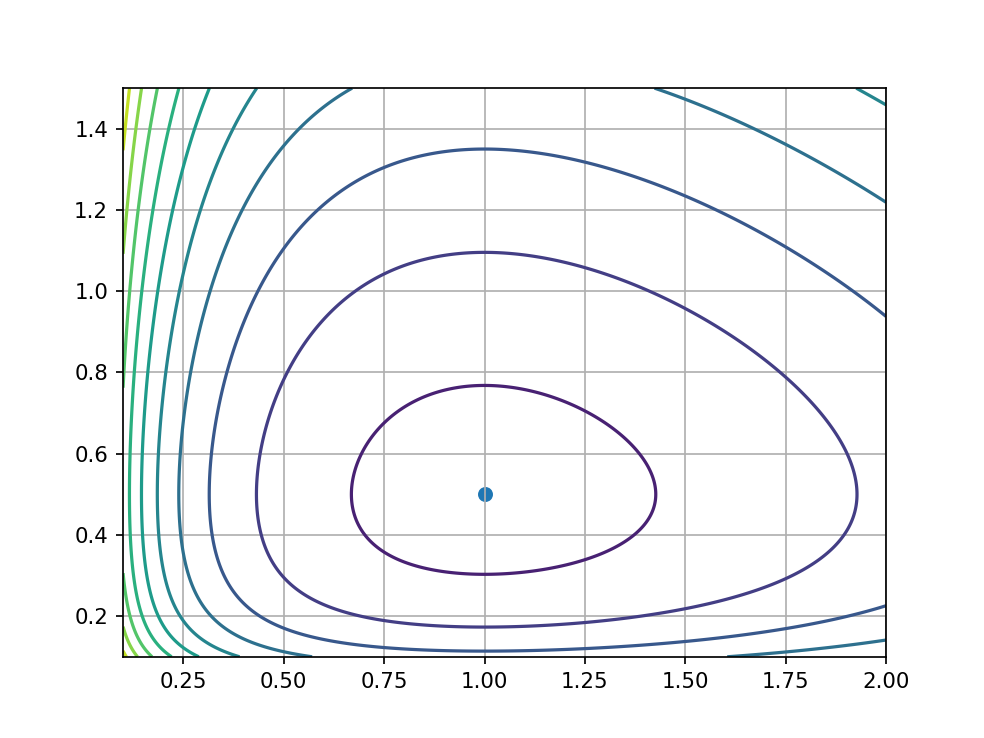

In [4]:
def H(x1,x2):
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

plt.figure()
x1 = np.linspace(0.1, 2, 1000)
x2 = np.linspace(0.1, 1.5, 1000)
X1, X2 = np.meshgrid(x1, x2)
Z = H(X1,X2)
plt.grid(True)
plt.contour(X1,X2,Z,levels=10)
xbar = np.array([gamma/delta,alpha/beta])
plt.scatter(xbar[0],xbar[1])

L'équilibre $\bar{x}$ se trouve au milieu des courbes de niveau (car c'est en fait le minimum de $H$). Donc si on se donne $\varepsilon >0$, on peut trouver $\eta_H>0$ tel que $H(x)<\eta_H$ implique $|x-\bar{x}|<\varepsilon$. On en déduit que pour toute condition initiale telle que $H(x_0)<\eta_H$, la trajectoire reste à une distance inférieure à $\varepsilon$ de $\bar{x}$. Par ailleurs, l'ensemble des courbes des niveaux de $H$ inférieures à $\eta_H$ constituent bien un voisinage de $\bar{x}$ donc $\bar{x}$ est stable par définition.

Algorithmes d'Euler 
------------



On veut résoudre une équation différentielle générale du type $\dot{x} = F(t,x)$

In [5]:
def solve_euler_explicit(F, t0, x0, dt, t_f):
    ts, xs = [t0], [x0]
    while ts[-1] < t_f:
        t, x = ts[-1], xs[-1]
        t_next, x_next = t + dt, x + dt * F(t,x)
        ts.append(t_next); xs.append(x_next)
    return (np.array(ts), np.array(xs).T)

In [6]:
def solve_euler_implicit(F, t0, x0, dt, t_f, itermax = 100):
    ts, xs = [t0], [x0]
    while ts[-1] < t_f:
        t, x = ts[-1], xs[-1]
        t_next, x_next0 = t + dt, x + dt * F(t,x)
        x_next1 = x + dt*F(t,x_next0)
        iter = 1;
        while np.linalg.norm(x_next1-x_next0)/np.linalg.norm(x_next0)>0.01 and iter<itermax:
            x_next0 = x_next1;
            x_next1 = x + dt*F(t,x_next0)
            iter += 1
        ts.append(t_next); xs.append(x_next1)
    return (np.array(ts), np.array(xs).T)

Pour illustrer la convergence de ces deux algos :
- on choisit une dynamique aux solutions connues, par exemple $\dot{x}=A x$, dont les solutions sont $x(t)=\exp(A (t-t_0))x_0$
- on simule les solutions numériques données par Euler pour un horizon de temps $t_f$ fixé et différentes valeurs de $dt$ tendant vers 0
- on enregistre pour chaque simu la valeur maximale de l'erreur entre la solution exacte et numérique sur l'horizon de temps $[0,t_f]$
- on trace le log de l'erreur en fonction de $\log dt$
- on doit obtenir une courbe majorée par une droite, dont la pente donne directement l'ordre de convergence.
En effet, le fait que l'erreur maximale tend vers 0 lorsque dt tends vers 0 donne la convergence, et par définition, $\max_j |x^j-x(t_j)| \leq c_v dt^p$ où $p$ dénote l'ordre de convergence, donc
$$
\log \max_j |x^j-x(t_j)| \leq \log c_v + p \log dt
$$
Ici on trouve un ordre de convergence égal à 1.

Application au système
-------------------------------

<IPython.core.display.Javascript object>


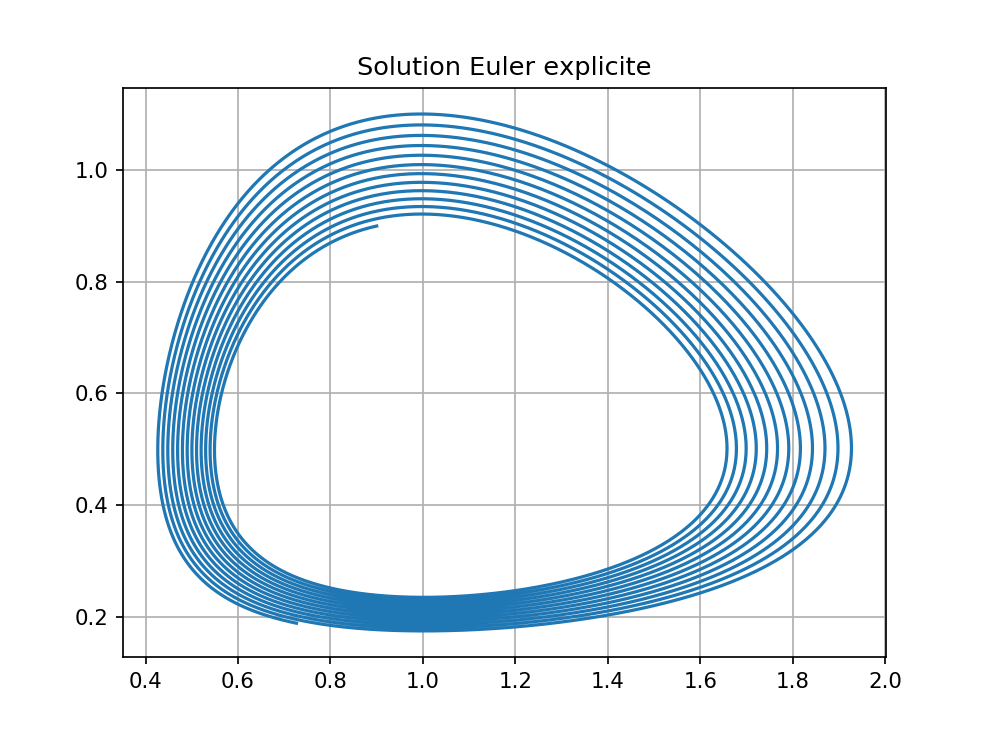

<IPython.core.display.Javascript object>


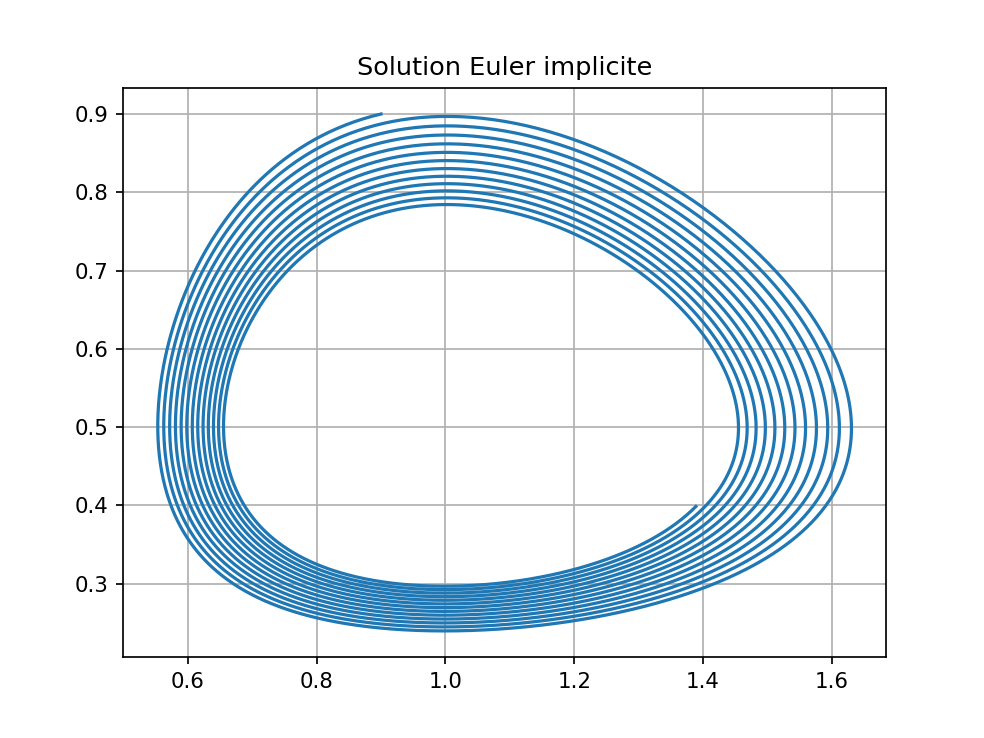

<IPython.core.display.Javascript object>


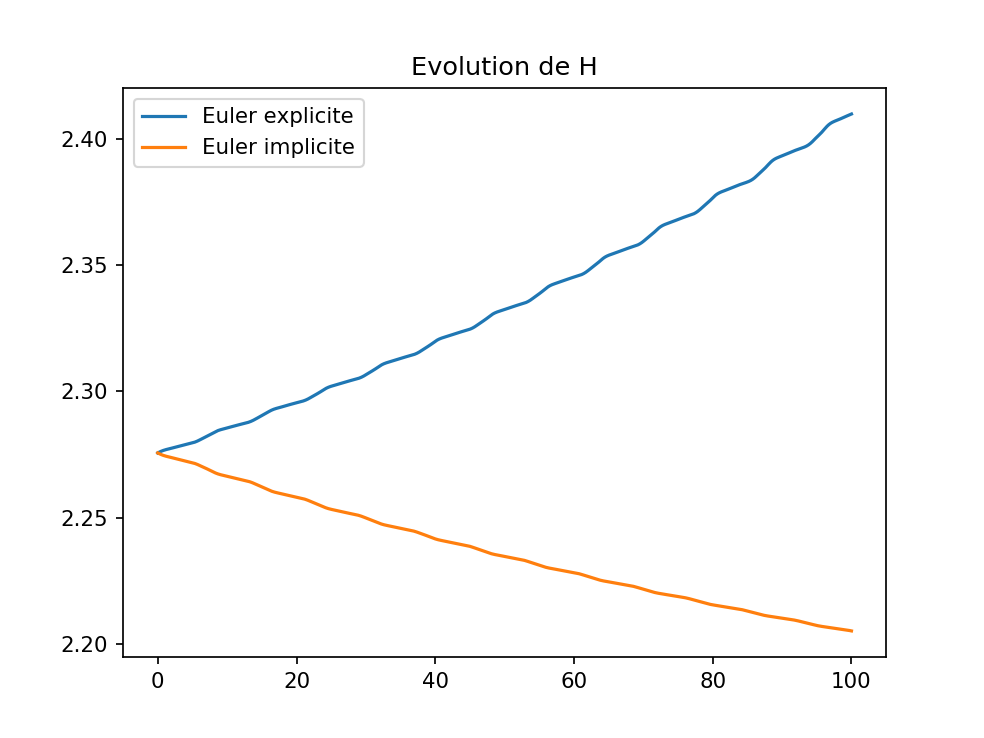

Text(0.5, 1.0, 'Evolution de H')

In [7]:

t0, x0 = 0.0, np.array([0.9, 0.9])
dt, tf = 0.01, 100
t, x = solve_euler_explicit(lambda _t,_x : f_LV(_x), t0, x0, dt, tf)
H_explicit = H(x[0],x[1])

plt.figure()
plt.plot(x[0],x[1])
plt.grid(True)
plt.title('Solution Euler explicite')

t, x = solve_euler_implicit(lambda _t,_x : f_LV(_x), t0, x0, dt, tf)
H_implicit = H(x[0],x[1])

plt.figure()
plt.plot(x[0],x[1])
plt.grid(True)
plt.title('Solution Euler implicite')


plt.figure()
plt.plot(t,H_explicit,label = "Euler explicite")
plt.plot(t,H_implicit,label = "Euler implicite")
plt.legend()
plt.title('Evolution de H')



Aucun des deux algos ne permet de conserver la fonction $H$ et donc n'est fidèle à la réalité sur un temps long. Avec l'explicite, on a tendance a gagner en énergie alors qu'avec l'implicite, on en perd au fur et à mesure.

Euler modifié
===============

Question 9
--------------

Soit une condition initiale $x_0\in \mathbb{R}_{>0}\times\mathbb{R}_{>0}$. Si $H_0=H(x(0))$, la solution du système de Lotka-Volterra vérifie
$$
H(x(t))=H_0 \qquad \forall t
$$
donc elle est aussi solution de la dynamique modifiée. Or par Cauchy-Lipschitz, puisque $u$ est $C^1$, cette solution est unique.


Question 10
---------------------
On a 
$$
\frac{d}{dt}(H(x(t))-H_0) = - \langle \nabla H(x(t)), u(x(t))  \rangle (H(x(t))-H_0) = - k \| \nabla H(x(t))\|^2 (H(x(t))-H_0)
$$
pour $u(x) = \nabla H(x)$. Or
$$
\nabla H(x) = 0 \quad \Longleftrightarrow \quad x=\bar{x}
$$
et s'il existe $\epsilon>0$ tel que $\|x(t)-\bar{x}\|>\epsilon$ pour tout $t$ alors il existe $\delta>0$ tel que $\| \nabla H(x(t))\|>\delta$ pour tout $t$. On a alors
$$
\frac{d}{dt}(H(x(t))-H_0) \leq -k\delta^2 (H(x(t))-H_0)
$$
et donc
$$
\left[\frac{d}{dt}(H(x(t))-H_0)+k\delta^2 (H(x(t))-H_0)\right] e^{k\delta^2 t} \leq 0
$$
soit
$$
\frac{d}{dt}\left[  (H(x(t))-H_0)e^{k\delta^2 t} \right] \leq 0
$$
et donc finalement
$$
(H(x(t))-H_0) \leq (H(x(0))-H_0)e^{-k\delta^2 t}
$$

Question 11
---------

<IPython.core.display.Javascript object>


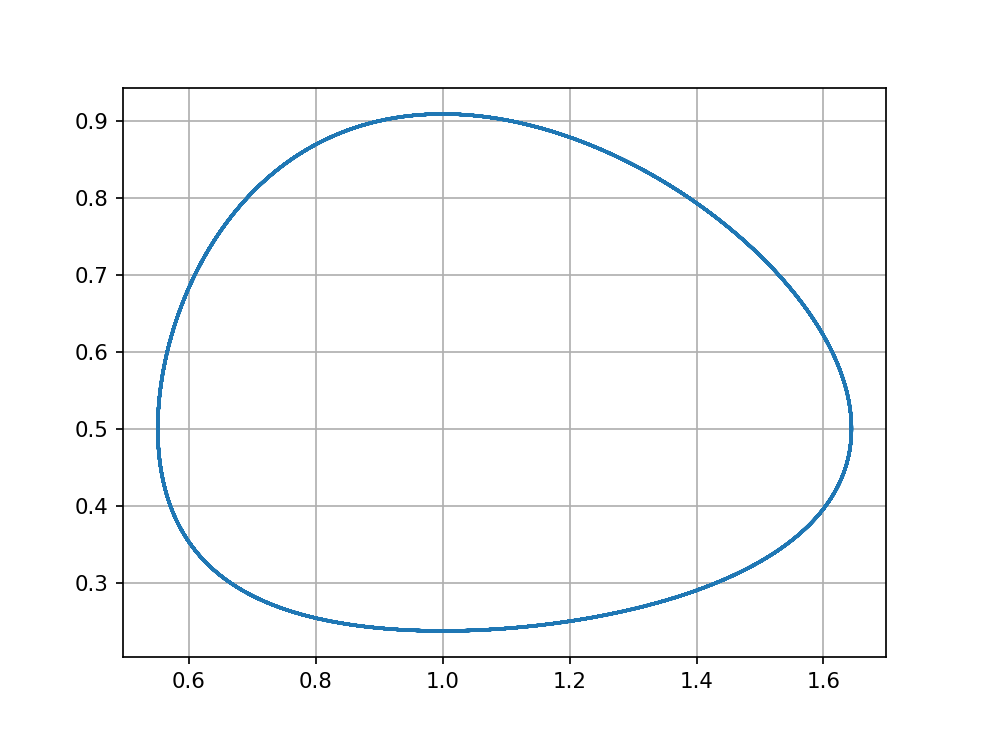

<IPython.core.display.Javascript object>


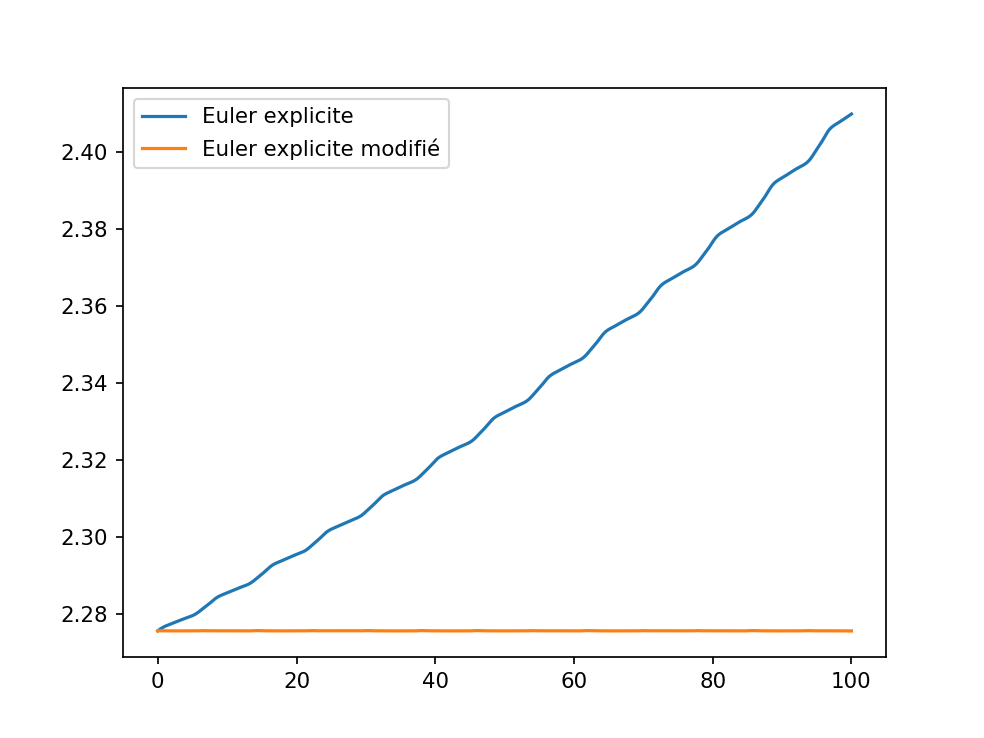

In [8]:
k = 100;

def grad_H(x):
    return np.array([delta-gamma/x[0], beta-alpha/x[1]])

def solve_euler_explicit_mod(F, t0, x0, dt, t_f):
    ts, xs = [t0], [x0]
    H0 = H(x0[0],x0[1])
    while ts[-1] < t_f:
        t, x = ts[-1], xs[-1]
        t_next, x_next = t + dt, x + dt * (F(t,x)-k*(H(x[0],x[1])-H0)*grad_H(x))
        ts.append(t_next); xs.append(x_next)
    return (np.array(ts), np.array(xs).T)

t0, x0 = 0.0, np.array([0.9, 0.9])
dt, tf = 0.01, 100
t, x = solve_euler_explicit_mod(lambda _t,_x : f_LV(_x), t0, x0, dt, tf)
H_explicit_mod = H(x[0],x[1])

plt.figure()
plt.plot(x[0],x[1])
plt.grid(True)

plt.figure()
plt.plot(t,H_explicit,label = "Euler explicite")
plt.plot(t,H_explicit_mod,label = "Euler explicite modifié")
plt.legend()



Plus $k$ est grand, plus la convergence de $H$ est rapide et donc plus $H$ est forcé de rester proche de sa valeur initiale. Cependant, en notant $H_j=H(x^j)$ le long de la solution numérique du schéma d'Euler, on a 
$$
H_{j+1} = H\left(x^j + dt\left(f(x^j)-k\nabla H(x^j) (H_{j}-H_0)\right) \right)
$$
donc en développant pour $dt$ petit
$$
H_{j+1}-H_0 = H_{j}-H_0 +dt \left\langle\nabla H(x^j), \left(f(x^j)-k\nabla H(x^j) (H_{j}-H_0)\right) \right\rangle + O(dt^2) = (1- k dt\|\nabla H(x^j)\|^2)(H_{j}-H_0) + O(dt^2)
$$
Pour que le schéma soit stable au premier ordre, il faut donc que $k dt\|\nabla H(x^j)\|^2$ reste plus petit que 2 ! 